# EDA on ag_news
1. EDA on dataset
2. EDA and visualization on word2vec

In [1]:
import pandas as pd
import nltk

In [2]:
# load data
df = pd.read_csv('../data/ag_news/train.csv')

In [3]:
df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


## Distributions
1. text length distribution
2. class distribution

In [28]:
df['text_len'] = df['Description'].apply(lambda x: len(x.split()))
df['text_len'].describe()

count    120000.000000
mean         31.060508
std           9.760460
min           1.000000
25%          25.000000
50%          30.000000
75%          36.000000
max         173.000000
Name: text_len, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe36eb00240>]],
      dtype=object)

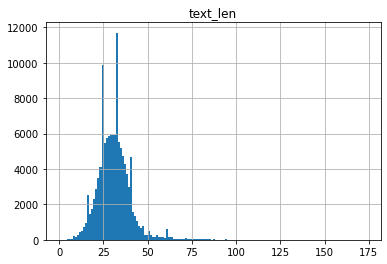

In [34]:
df.hist(column=['text_len'], bins=150)    # bins count chosen manually

In [27]:
df['Class Index'].value_counts()

4    30000
3    30000
2    30000
1    30000
Name: Class Index, dtype: int64

## Word Count and Distribution

In [42]:
%%time
lst_text = df['Description'].tolist()
lst_all_text = ''

for text in lst_text:
    lst_all_text += text + ' '

CPU times: user 43.5 ms, sys: 32.9 ms, total: 76.3 ms
Wall time: 75.2 ms


In [43]:
tokenizer = nltk.RegexpTokenizer(r"\w+")
lst_token = tokenizer.tokenize(lst_all_text)

In [49]:
df_token = pd.DataFrame(lst_token, columns=['token'])
df_token['token'].value_counts().nlargest(10)

the    174007
to      96366
a       95587
of      89430
in      76329
and     66128
on      47399
s       43701
for     37312
39      31874
Name: token, dtype: int64

In [51]:
# seeing that top 10 are all stop words, we will remove stop words and count word frequency again
from nltk.corpus import stopwords
nltk.download('stopwords')

print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/henry/nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data]   Unzipping corpora/stopwords.zip.


In [52]:
%%time
lst_token_clean = []

for token in lst_token:
    if token.lower() not in stopwords.words('english'):
        lst_token_clean.append(token)

CPU times: user 5min 27s, sys: 31.4 s, total: 5min 58s
Wall time: 5min 58s


In [56]:
df_token_clean = pd.DataFrame(lst_token_clean, columns=['token'])
df_token_clean['token'].value_counts().nlargest(20)

39           31874
said         20086
Reuters      13008
new           9033
quot          8941
US            8743
year          8740
AP            8498
two           8317
first         8312
gt            8016
lt            7981
Monday        7505
Wednesday     7460
Tuesday       7388
Thursday      7287
company       6956
Friday        6789
Inc           6779
one           6379
Name: token, dtype: int64

## Word2Vec Model Exploration
1. similarity between words
2. linear relationships

In [77]:
print(df['Description'][2])

Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.


In [60]:
from gensim.models import Word2Vec

model = Word2Vec.load('../model/w2v/ag_news.model')

In [89]:
model.most_similar('US')[:10]

/media/henry/data/School/master_thesis/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('U.S.', 0.8981137871742249),
 ('Australian', 0.672760009765625),
 ('British', 0.6517934203147888),
 ('American', 0.6505104899406433),
 ('French', 0.5683607459068298),
 ('US-led', 0.5559966564178467),
 ('American-led', 0.545295000076294),
 ('Chinese', 0.5274636745452881),
 ('Russian', 0.5175220370292664),
 ('German', 0.5171641111373901)]

In [88]:
model.most_similar('UC')[:10]

/media/henry/data/School/master_thesis/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Berkeley', 0.841340184211731),
 ('Palo', 0.7645214796066284),
 ('Dalhousie', 0.7402728796005249),
 ('MIT', 0.7364505529403687),
 ('Monica', 0.7148130536079407),
 ('Carnegie', 0.7146080732345581),
 ('Trinity', 0.7124419808387756),
 ('Engineers', 0.7088638544082642),
 ('WOMEN', 0.706561267375946),
 ('MOJAVE', 0.7045356631278992)]

In [78]:
model.most_similar('soaring')[:10]

/media/henry/data/School/master_thesis/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('rising', 0.855433464050293),
 ('commodity', 0.83181232213974),
 ('gasoline', 0.8130218386650085),
 ('record-high', 0.8062750697135925),
 ('borrowing', 0.7648983597755432),
 ('declining', 0.7591405510902405),
 ('excess', 0.7481698989868164),
 ('diesel', 0.7397214770317078),
 ('petroleum', 0.7347115278244019),
 ('surging', 0.7340205907821655)]

In [82]:
model.most_similar(positive=['bank'], negative=['lending'])

/media/henry/data/School/master_thesis/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('mayor', 0.5085882544517517),
 ('woman', 0.4726904034614563),
 ('man', 0.4517316222190857),
 ('club', 0.44433751702308655),
 ('businessman', 0.43862777948379517),
 ('state', 0.4352131485939026),
 ('team', 0.43053919076919556),
 ('Pennsylvania', 0.428428590297699),
 ('prosecutor', 0.42091843485832214),
 ('Spitzer', 0.41061294078826904)]

In [86]:
model.most_similar(positive=['businessman', 'bank'], negative=[])

/media/henry/data/School/master_thesis/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('tycoon', 0.6912703514099121),
 ('broker', 0.6709105372428894),
 ('insurer', 0.6663442850112915),
 ('banker', 0.6657851934432983),
 ('bankers', 0.6575058698654175),
 ('steelmaker', 0.6542369723320007),
 ('regulator', 0.6480527520179749),
 ('lender', 0.631690263748169),
 ('Malcolm', 0.6261794567108154),
 ('firm', 0.6109026074409485)]